In [2]:
2+2

4

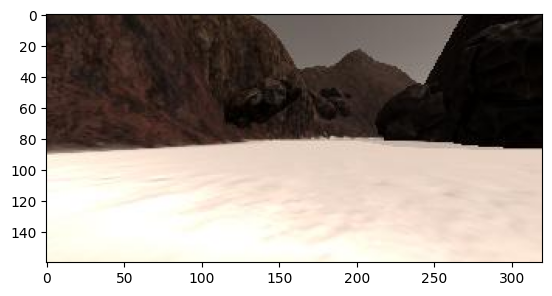

In [3]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

# read and import image

filename = "robocam.jpg"
image = mpimg.imread(filename)
plt.imshow(image)
plt.show()

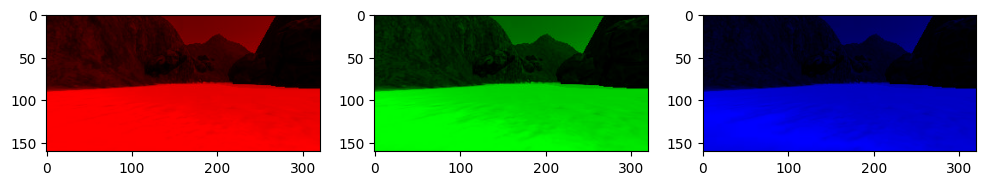

47.41483072916667 43.25189453125 40.310970052083334


In [4]:
import numpy as np
# Note: we use the np.copy() function rather than just saying red_channel = image
# because in Python, such a statement would set those two arrays equal to each other
# forever, meaning any changes made to one would also be made to the other!

filename = "robocam.jpg"
image = mpimg.imread(filename)

red_channel = np.copy(image)
green_channel = np.copy(image)
blue_channel = np.copy(image)

red_channel[:,:,[1,2]] =0 # zero out green and blue
green_channel[:,:,[0,2]] = 0 # zero out red and blue
blue_channel[:,:,[0,1]] = 0 # zero out red andgreen

fig = plt.figure(figsize=(12,3))
plt.subplot(131) #create a subplot grid with 1 row and 3 columns and activate 1st subplt
plt.imshow(red_channel)
plt.subplot(132) #create a subplot grid with 1 row and 3 columns and activate 2nd subplt
plt.imshow(green_channel)
plt.subplot(133) #create a subplot grid with 1 row and 3 columns and activate 3rd subplt
plt.imshow(blue_channel)
plt.show()

print(red_channel.mean(), green_channel.mean(), blue_channel.mean())

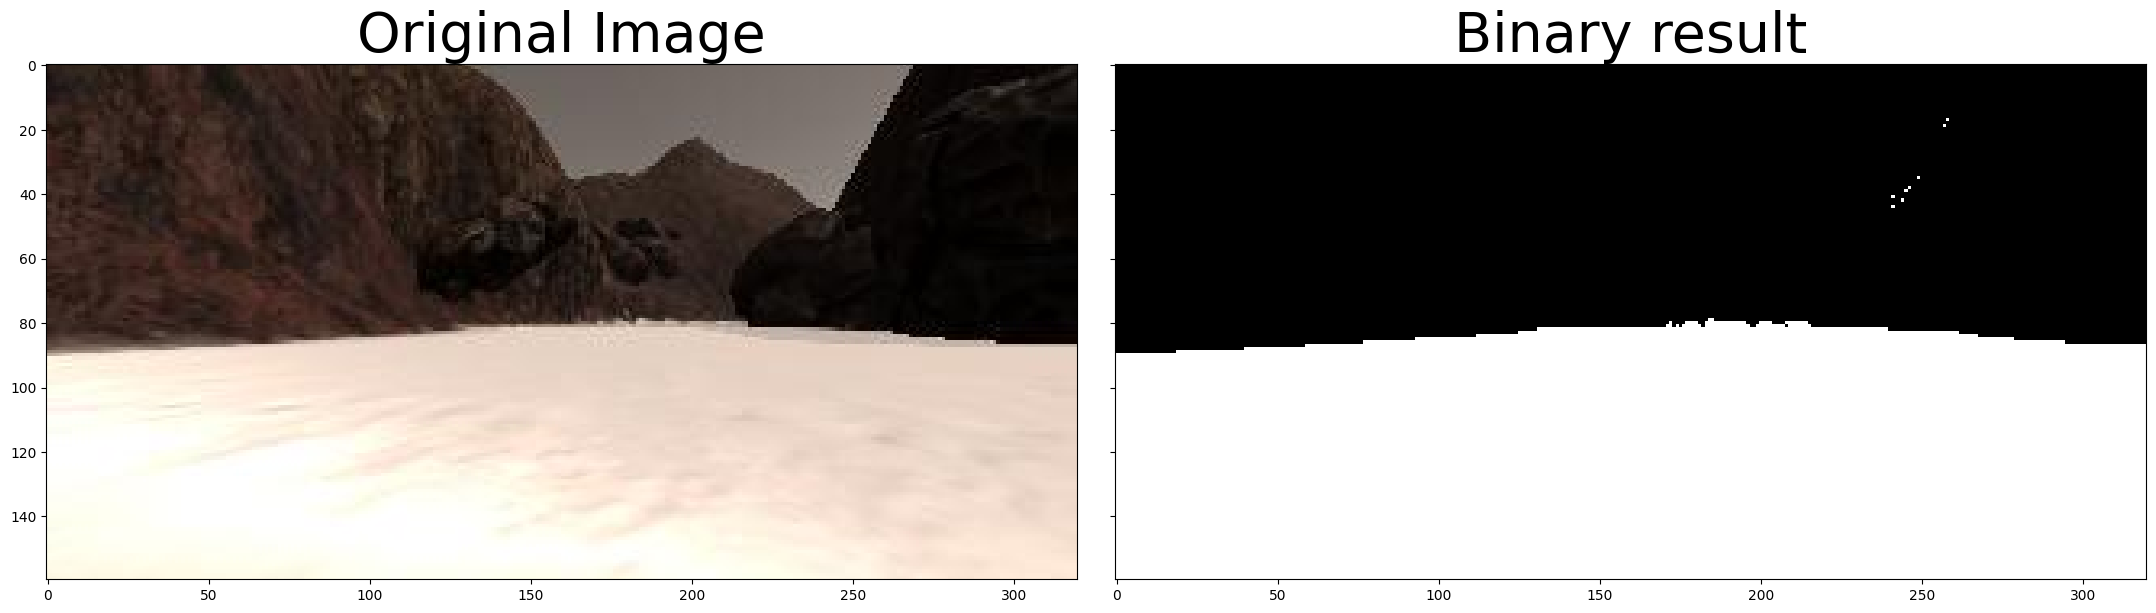

In [5]:
filename = "robocam.jpg"
image = mpimg.imread(filename)

red_thresh = red_channel.mean()
green_thresh = green_channel.mean()
blue_thresh = blue_channel.mean()
####
rgb_threshold= (round(140),round(140),round(140))

def color_thres(img, rgb_thresh=(0,0,0)):
    # Create an empty array the same size in x and y as the image 
    # but just a single channel
    binary_image = np.zeros_like(img[:,:,0])

    above_thresh = (img[:,:,0] > rgb_thresh[0]) \
                &   (img[:,:,1] > rgb_thresh[1] )\
                &   (img[:,:,2] > rgb_thresh[2])
    
    binary_image[above_thresh] = 1


    return binary_image

binary_img = color_thres(image, rgb_thresh=rgb_threshold)

#Display orignal image and binary image
f, (ax1, ax2) = plt.subplots(1,2,figsize=(21,7), sharey=True)
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize = 40)

ax2.imshow(binary_img, cmap = 'grey')
ax2.set_title('Binary result', fontsize = 40)
plt.subplots_adjust(left=0, right=1, top=0.9, bottom=0.)
plt.show()

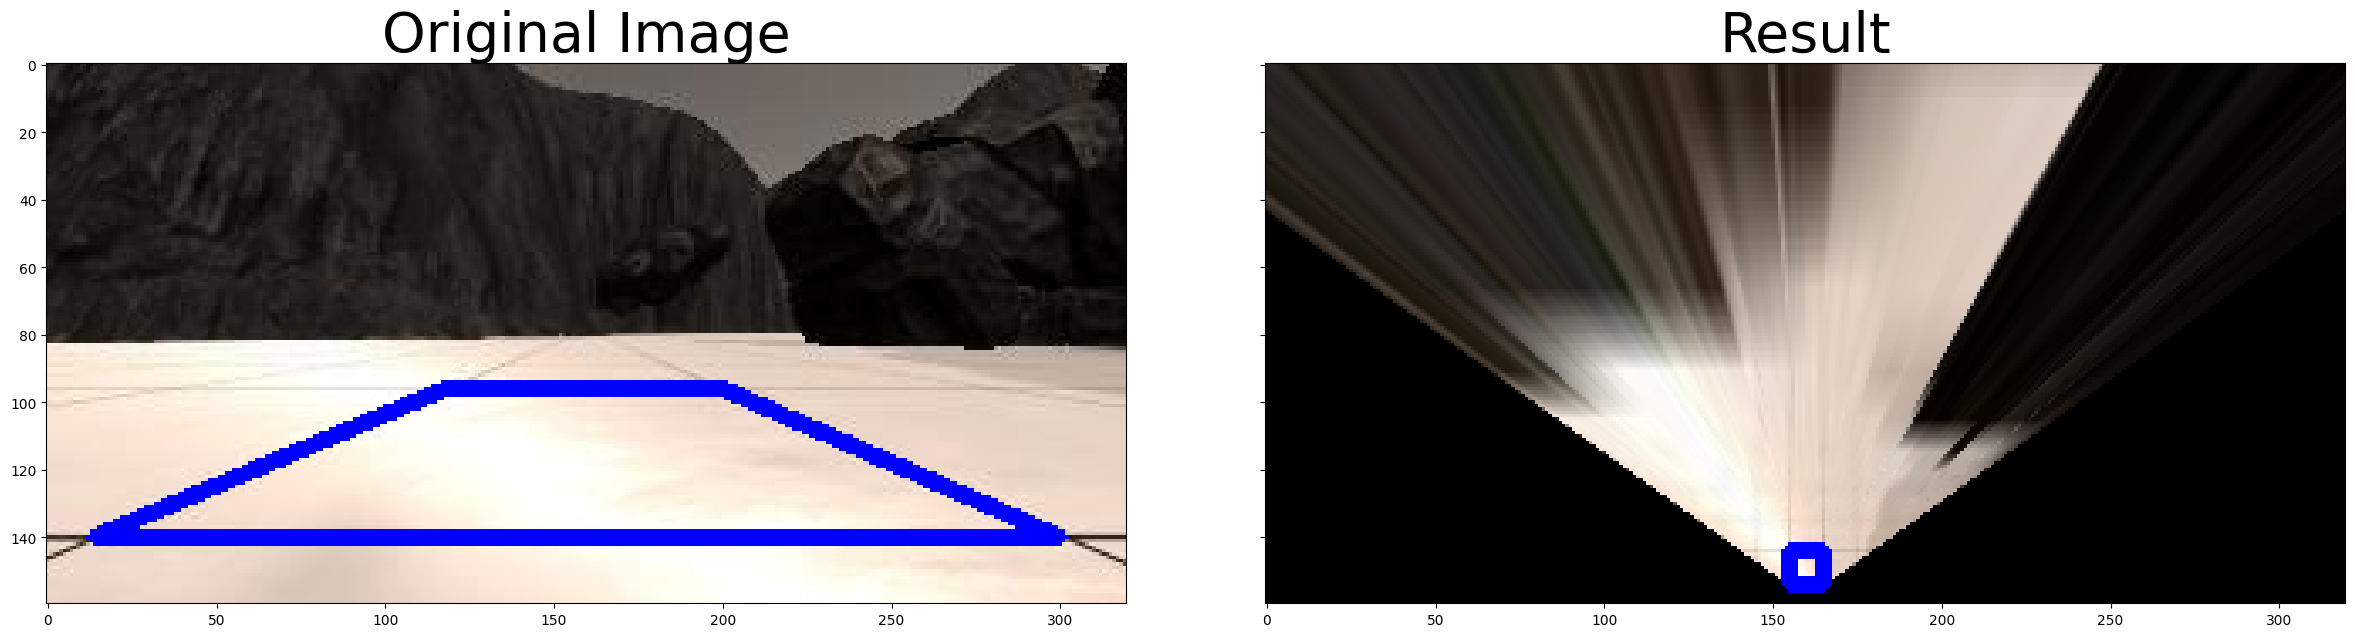

In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2 
import numpy as np
#%matplotlib widget

def perspect_transform(img, src, dst):
    # get the transform matrix using cv2.getPerspectivTransform()
    M = cv2.getPerspectiveTransform(src,dst)
    # Warp image using cv2.warpPerspective()
     # keep same size as input image
    warped = cv2.warpPerspective(img, M, (img.shape[1],img.shape[0]))
    return warped

image = mpimg.imread('example_grid1.jpg')
image = image.copy()
# Define source and destination points
# Define calibration box in source (actual) and destination (desired) coordinates
# These source and destination points are defined to warp the image
# to a grid where each 10x10 pixel square represents 1 square meter
dst_size = 5 
# Set a bottom offset to account for the fact that the bottom of the image 
# is not the position of the rover but a bit in front of it
bottom_offset = 6
source = np.float32([[14 ,140  ], [ 300, 140 ], [ 200, 96 ], [ 118 ,96 ]])
destination = np.float32([[image.shape[1]/2 - dst_size, image.shape[0] - bottom_offset],
                  [image.shape[1]/2 + dst_size, image.shape[0] - bottom_offset],
                  [image.shape[1]/2 + dst_size, image.shape[0] - 2*dst_size - bottom_offset], 
                  [image.shape[1]/2 - dst_size, image.shape[0] - 2*dst_size - bottom_offset],
                  ])




warped = perspect_transform(image, source, destination)
# Draw Source and destination points on images (in blue) before plotting
cv2.polylines(image, np.int32([source]), True, (0, 0, 255), 3)
cv2.polylines(warped, np.int32([destination]), True, (0, 0, 255), 3)
# Display the original image and binary               
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 6), sharey=True)
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=40)

ax2.imshow(warped, cmap='gray')
ax2.set_title('Result', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show() # Uncomment if running on your local machine